# Salary survey: Data analysis for salary among managers in the world. 

This will be a project based on the CRISP model, this means here will be developed six steps for the analysis:

1.- Business understanding.

2.- Data understanding.

3.- Preparation.

4.- Modeling.

5.- Evaluation.

6.- Deploy.

Maybe here can be used NLP for open questions. 

Will be developed a story about a fictional organization using this data. 


Data recovered from here: https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html

This data is related with salary in many professional fields around the globe. Here are records from managers, systems engineers, librarians, and so on. The example of the questions is the next:

- How old are you?
- What industry do you work in?
- Job title
- If your job title needs additional context, please clarify here:
- What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)
- How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.
- Please indicate the currency
- If "Other," please indicate the currency here:
- If your income needs additional context, please provide it here:
- What country do you work in?
- If you're in the U.S., what state do you work in?
- What city do you work in?
- How many years of professional work experience do you have overall?
- How many years of professional work experience do you have in your field?
- What is your highest level of education completed?
- What is your gender?
- What is your race? (Choose all that apply.)


with this can be started the search and Exploratory Data Analysis

In [1]:
from Analysis_module.Analysis_module import Data_analyzer

analyzer = Data_analyzer('./data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1 (1).csv')

analyzer.salary_survey_data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17
0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,-99,55000,0,USD,-99,-99,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,-99,54600,4000,GBP,-99,-99,United Kingdom,-99,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,-99,34000,0,USD,-99,-99,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,-99,62000,3000,USD,-99,-99,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,-99,60000,7000,USD,-99,-99,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


The analyzer module is in charge of quick cleanising, like replace of missing values with -99 strings and data type coertion. 

The colums are codificated, but each column corresponds with the questions previously setted. Anyway, there is a data dictionary to review each variable.

In [2]:
analyzer.data_dictionary['col_1']

{'original_name': 'How old are you?',
 'values': array(['25-34', '45-54', '35-44', '18-24', '65 or over', '55-64',
        'under 18'], dtype=object),
 'frequencies': 25-34         12599
 35-44          9869
 45-54          3174
 18-24          1186
 55-64           991
 65 or over       92
 under 18         11
 Name: How old are you?, dtype: int64,
 'values_count': 7}

And a short version of the questions and answers to put data into plots.

In [3]:
analyzer.categorical_short_description['col_1']

{'name': 'Age',
 'answers': {'25-34': '25-34',
  '45-54': '45-54',
  '35-44': '35-44',
  '18-24': '18-24',
  '65 or over': '>=65',
  '55-64': '55-64',
  'under 18': '<=18'}}

About the structure of the data the shape is the next:

In [4]:
analyzer.salary_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27922 entries, 0 to 27921
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   col_0   27922 non-null  datetime64[ns]
 1   col_1   27922 non-null  object        
 2   col_2   27922 non-null  object        
 3   col_3   27922 non-null  object        
 4   col_4   27922 non-null  object        
 5   col_5   27922 non-null  int64         
 6   col_6   27922 non-null  int64         
 7   col_7   27922 non-null  object        
 8   col_8   27922 non-null  object        
 9   col_9   27922 non-null  object        
 10  col_10  27922 non-null  object        
 11  col_11  27922 non-null  object        
 12  col_12  27922 non-null  object        
 13  col_13  27922 non-null  object        
 14  col_14  27922 non-null  object        
 15  col_15  27922 non-null  object        
 16  col_16  27922 non-null  object        
 17  col_17  27922 non-null  object        
dtypes: dat

In [5]:
analyzer.salary_survey_data.shape

(27922, 18)

This dataset have a shape of 27922 rows and 18 columns. 

Six categorical variables: 
- Industry, 
- US state, 
- Education level, 
- Gender
- Currency  
- Race

Race is treated as string, with values separated by commas, because is a multiple choide question variable. Hence, this last variable requires special treatment, like dummy variables. 

Three rank variables:
- Age
- Total years of work
- Field years of work

Six character variables:
- Job title
- Job context
- Other currency
- Income context
- Country
- City

Two numerical variables
- Annual salary
- Additional compensation


We have one last variable: Timestamp. Date and moment when the observation was recorded.

The dependant variable is the salary, but isn't homogeneous because the numbers corresponds to distinct currencies. Let's see more about it:

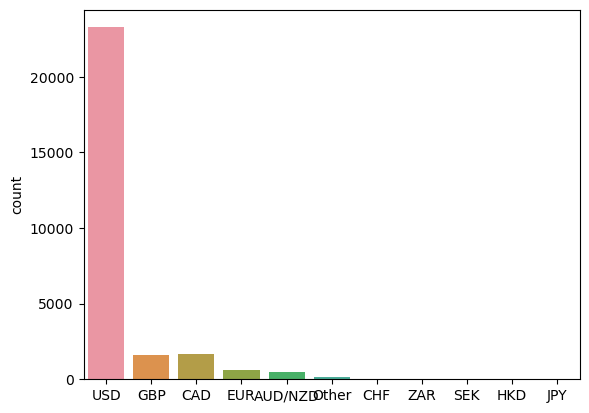

In [6]:
analyzer.create_bar_plot(x_cat='col_7', use_full_data=True)



It's notorious that the data group in dollars is the most representative, we are going to see more details of the data of other currencies to know if it's convenient to convert or eliminate them.

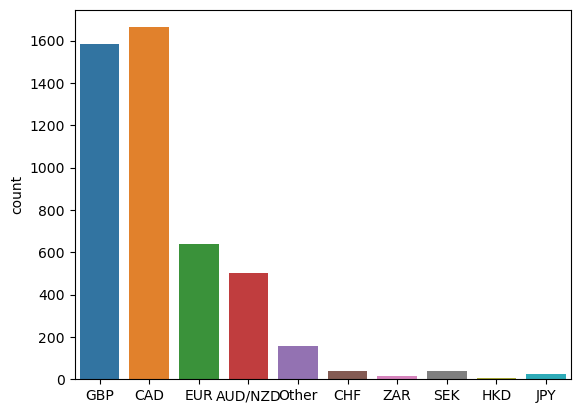

In [7]:
analyzer.create_new_subset('no_usd_group', lambda data: data[data['col_7'] != 'USD'], use_full_set=True)
analyzer.create_bar_plot(x_cat='col_7', data_subset='no_usd_group')

In [8]:
no_usd_rows, no_usd_columns = analyzer.subset_data['no_usd_group'].shape
full_data_rows, full_data_columns = analyzer.salary_survey_data.shape

print(f'The percentaje of the no usd group is: {(no_usd_rows/full_data_rows)*100}%')

The percentaje of the no usd group is: 16.671441873791277%


In [9]:
analyzer.subset_data['no_usd_group'].col_7.value_counts()

CAD        1663
GBP        1585
EUR         637
AUD/NZD     500
Other       155
CHF          37
SEK          37
JPY          23
ZAR          14
HKD           4
Name: col_7, dtype: int64

There are 1663 observations with a salary in canadian dollars, and 1585 observations in pound sterling, 637 in euros and 500 in australian dollars. Every else currency is too small to be considered (270 observations). Let's check the dates of this subgroups.

In [10]:
analyzer.create_new_subset('usd_salary_group', lambda data: data[data['col_7'] == 'USD'] , use_full_set=True)
analyzer.create_new_subset('cad_group', lambda data: data[data['col_7'] == 'CAD'], use_full_set=True)
analyzer.create_new_subset('gbp_group', lambda data: data[data['col_7'] == 'GBP'], use_full_set=True)
analyzer.create_new_subset('eur_group', lambda data: data[data['col_7'] == 'EUR'], use_full_set=True)
analyzer.create_new_subset('aud_group', lambda data: data[data['col_7'] == 'AUD/NZD'], use_full_set=True)

We got now subset for each currency. An API was used previously to get currency for each date, hence, we are available to convert the currencies to USD and add extra column to store the converted currency.

In [11]:
analyzer.create_and_set_transformed_salary(data_set='cad_group', currency_rate='cad_to_usd')
analyzer.create_and_set_transformed_salary(data_set='gbp_group', currency_rate='gbp_to_usd')
analyzer.create_and_set_transformed_salary(data_set='eur_group', currency_rate='eur_to_usd')
analyzer.create_and_set_transformed_salary(data_set='aud_group', currency_rate='aud_to_usd')

#This col adding is to keep the column shape of the data sets, in such a way could be merged
analyzer.subset_data['usd_salary_group']['col_18'] = analyzer.subset_data['usd_salary_group']['col_5']

Now we have four data sets, for each currency recovered previously from api. And this data sets have an extra column. We will merge them with USD group to apply analysis to only one global data set.

In [12]:
analyzer.merge_subsets('fixed_usd_group')

analyzer.subset_data['fixed_usd_group'].head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18
0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,-99,55000,0,USD,-99,-99,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,55000.0
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,-99,34000,0,USD,-99,-99,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,34000.0
3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,-99,62000,3000,USD,-99,-99,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,62000.0
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,-99,60000,7000,USD,-99,-99,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,60000.0
5,2021-04-27 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,-99,62000,0,USD,-99,-99,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White,62000.0


In [13]:
analyzer.subset_data['fixed_usd_group'].shape

(27652, 19)

The data was merged successfully and now there is a col_18 feature with the usd value corresponding to the currecies. Let's explore this column with a box plot.

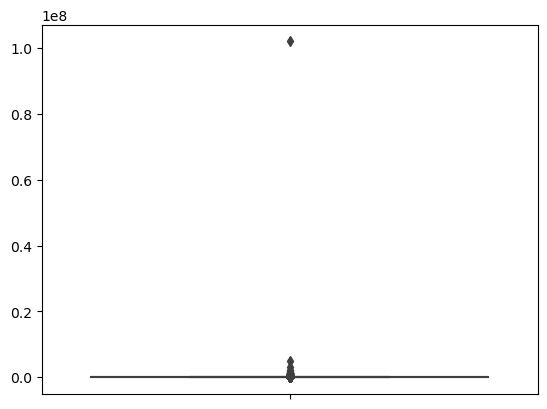

In [14]:
analyzer.create_box_plot(y_cont='col_18', data_subset='fixed_usd_group')

In [15]:
analyzer.subset_data['fixed_usd_group'][(analyzer.subset_data['fixed_usd_group'].col_18 > 170000)].shape

(1676, 19)

That's just a preview, but there are a lot of outlier values. Cutting them let a dataset with more analizable data. The missing data by this proccess increases by 1676, all with salaries bigger than 170,000 USD. the total percentaje of the missin data is given by the next code line.

In [16]:
#this is the total percentaje of missing data
((1676 + 270)/27922)*100

6.96941479836688

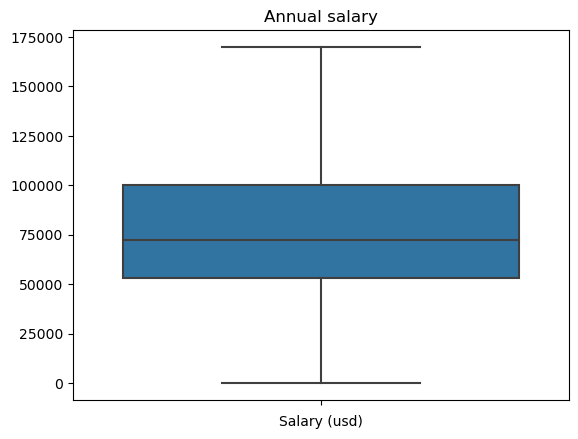

In [17]:
analyzer.subset_data['fixed_usd_group'].loc[3605, 'col_18'] = 102000000 * (1/3659.62)

analyzer.subset_data['fixed_usd_group'] = analyzer.subset_data['fixed_usd_group'][(analyzer.subset_data['fixed_usd_group'].col_18 <= 170000)]

analyzer.create_box_plot(y_cont='col_18', data_subset='fixed_usd_group', title='Annual salary', x_label='Salary (usd)')

After the fixing of the group, there are still data that is an outlier following the boxplot ilustration. After outlier deletion the missing data percentaje is **6.96%**. This analysis can go further.

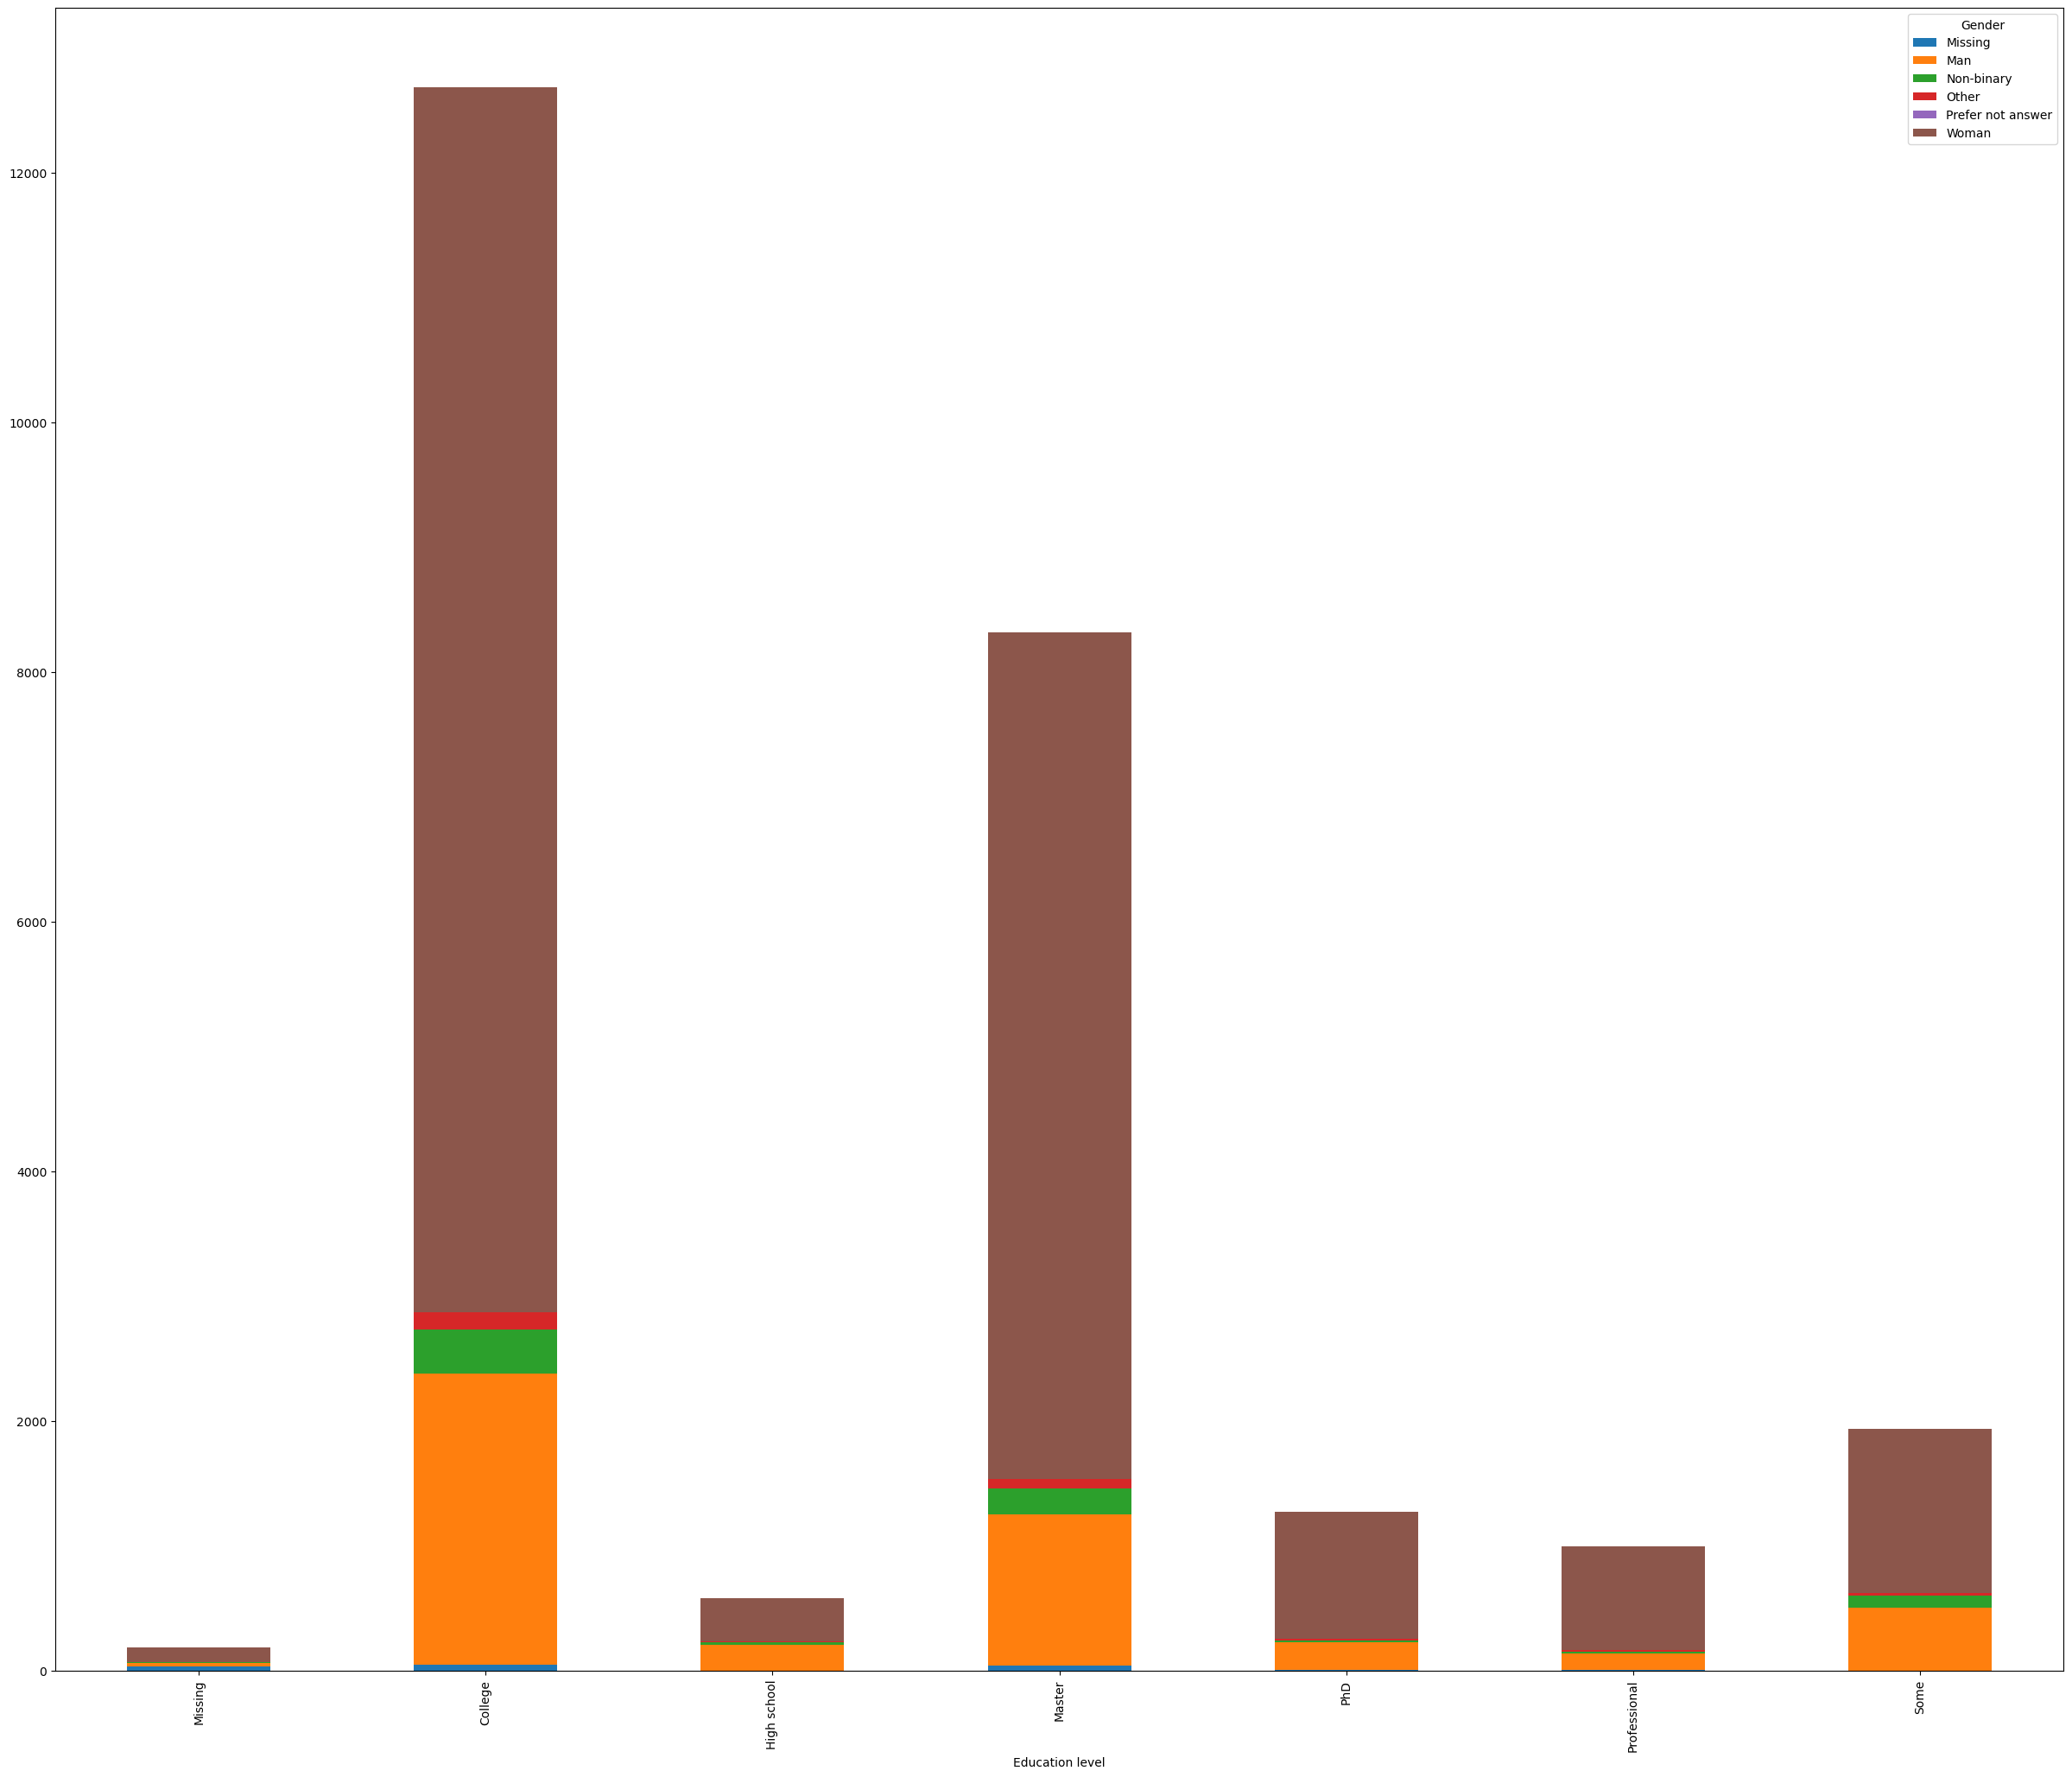

In [18]:
analyzer.create_multi_crosstabs(grid=[
    ('col_15', 'col_16')
], data_name='fixed_usd_group')